# Gradient Descent 

## Introduction 

Gradient Descent is a fundamental optimization algorithm used in machine learning to minimize a function. It iteratively adjusts the parameters of a model, aiming to find the minimum value of a cost function. The algorithm takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

### Advantages of Gradient Descent:
- **Scalability**: Works well with large datasets because it updates parameters incrementally as it sees an instance.
- **Simplicity**: Easy to implement and understand.

### Disadvantages of Gradient Descent:
- **Sensitivity to Learning Rate**: The choice of learning rate can significantly affect convergence — too small might slow down the convergence, too large can cause overshooting.
- **Local Minima and Saddle Points**: Can get stuck in local minima or saddle points, especially in non-convex optimizations.
- **Requires Numerous Iterations**: May need many iterations to converge which can be computationally expensive.

## Objective
In this notebook, we will implement the gradient descent algorithm to predict housing prices using the Boston Housing Dataset. We will explore how features of a house like the number of rooms, age, etc., can influence its price.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Loading and Exploring the Boston Housing Dataset

We will start by loading the dataset and exploring its features and target variable. Understanding the distribution and characteristics of the data will help us better design our model.


In [3]:
# Load the dataset
data = pd.read_csv('C:/Users/78641/Downloads/Boston Housing Dataset.csv')

# Display the first few rows of the dataframe
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [4]:
# Display general information about the dataframe
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [5]:
# Statistical summary of the dataframe
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

## Data Preprocessing

Before applying gradient descent, we need to preprocess our data. This includes dealing with missing values, feature scaling, and splitting the data into training and testing sets.

In [6]:
# 'MEDV' is the target variable
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Handling missing values if any
X.fillna(X.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Implementing Gradient Descent

Here we define a function to perform gradient descent optimization on our regression model.


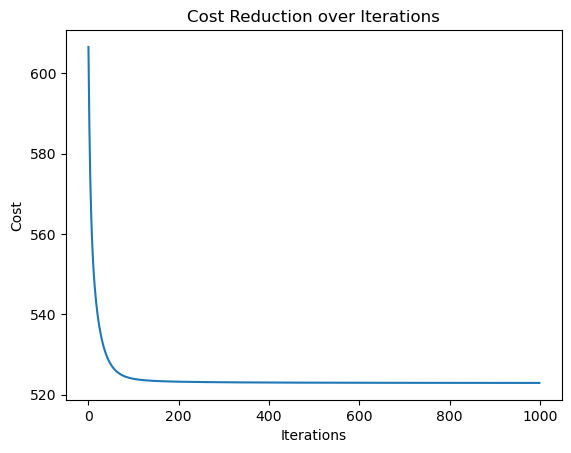

In [7]:
def gradient_descent(X, y, lr=0.01, n_iter=100):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for _ in range(n_iter):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 2/m * X.T.dot(errors)
        theta -= lr * gradients
        cost = (errors**2).mean()
        cost_history.append(cost)

    return theta, cost_history

# Perform gradient descent
theta, cost_history = gradient_descent(X_train, y_train, lr=0.01, n_iter=1000)

# Plotting the cost reduction
plt.plot(cost_history)
plt.title('Cost Reduction over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


- **Rapid Decrease in Cost**: The cost rapidly decreases in the initial iterations, which indicates that the gradient descent algorithm is quickly finding a path toward the minimum of the cost function.
  
- **Cost Convergence**: After the sharp decline, the cost levels off, which suggests that the algorithm has either found a minimum or is very close to it.

- **Potential Early Convergence**: Since the cost plateaus early and remains flat for the majority of the iterations, it's possible that the number of iterations is more than necessary for convergence in this case. The algorithm could potentially stop much earlier without significantly changing the outcome, saving computational resources.

In conclusion, the gradient descent algorithm seems to be working correctly as it's minimizing the cost function efficiently. However, further iterations beyond a certain point do not yield additional improvements, indicating that the model has reached convergence and further training isn't beneficial.

## Plot of MSE vs. Iterations

A useful diagnostic tool in optimizing models with gradient descent is to plot the Mean Squared Error (MSE) against the number of iterations. This plot can reveal information about how quickly the model is learning, how many iterations are necessary for convergence, and whether the learning rate is appropriately set.


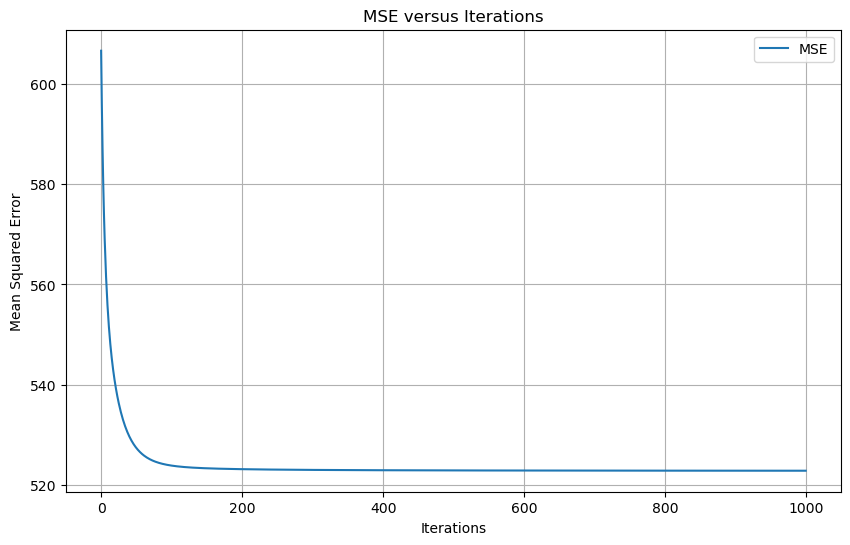

In [8]:
# The 'cost_history' is populated during the gradient descent process

import matplotlib.pyplot as plt

# Plot MSE versus iterations
plt.figure(figsize=(10, 6))
plt.plot(cost_history, label='MSE')
plt.title('MSE versus Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

- **Efficient Learning**: The significant decrease at the start shows that the gradient descent algorithm is efficiently reducing the MSE and the model is learning quickly.
- **Convergence**: The leveling off of the MSE curve suggests that the model has converged to its optimal point quite rapidly.
- **Possible Overfitting**: Since the curve flattens out and does not improve after a certain number of iterations, further iterations are likely not beneficial and could lead to overfitting if the model were to continue training.
- **Potential for Early Stopping**: Given that the MSE stabilizes early, implementing an early stopping mechanism could save computational resources without sacrificing model performance.

In summary, the gradient descent algorithm appears to be effective in minimizing MSE for this problem, and the model converges to a solution quickly.

## Actual vs Predicted Values Plot

Next, we'll visualize the performance of our model by plotting the actual target values against our predicted values. This will give us a clear visual indication of how well our model is predicting the housing prices.


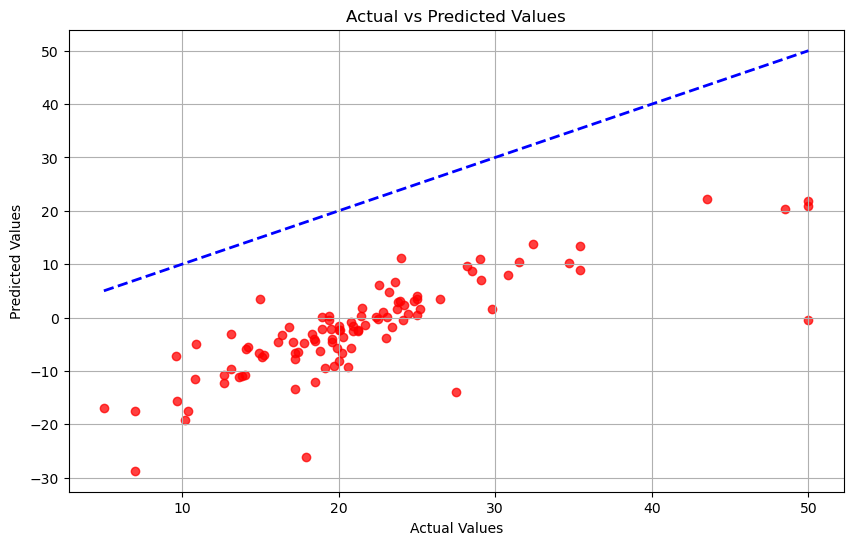

In [10]:
# Make predictions on the test set
y_pred = X_test.dot(theta)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='red') # Actual vs Predicted points
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
# Plotting the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', lw=2)
plt.grid(True)
plt.show()


- **Overestimation and Underestimation**: Many predictions fall far below the blue line, suggesting the model is often underestimating the actual values. There are also instances of overestimation, as seen by points above the line.
- **Prediction Range Limitation**: The model seems to have a limited range of predicted values, mostly between -20 to 20, which doesn't cover the actual value range well.
- **Further Investigation Needed**: Further diagnostic analysis is required to identify the source of the prediction errors, which may involve looking at residuals, reconsidering feature selection, or model complexity.